In [1]:
%mathplotlib inline

UsageError: Line magic function `%mathplotlib` not found.


In [8]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import scipy.special
import scipy.ndimage
import scipy.signal
from random import *

In [9]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 31s 3us/step


8
[[3.33115638e-02]
 [1.27247858e-04]
 [9.57799910e-04]
 [1.36008044e-04]
 [3.93954449e-04]
 [5.51389930e-03]
 [1.25517090e-03]
 [2.21946406e-04]
 [9.88253152e-01]
 [4.15539238e-02]]


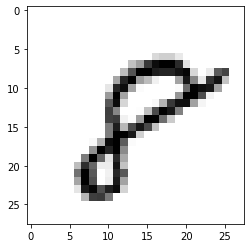

In [32]:
n=59999
print(y_train[n])
plt.imshow((255-x_train[n])/255, cmap = "gray")
print(test(n))

In [26]:
class MyNN:
    def __init__(self, rate, inputs, hiddens, outputs):
        self.i_count=inputs+1
        self.h_count=hiddens
        self.o_count=outputs
        #Заполняем массивы весов рандомом
        self.w_ih = np.random.normal(0.0, pow(self.h_count, -0.5),(self.h_count, self.i_count))
        self.w_ho = np.random.normal(0.0, pow(self.o_count, -0.5),(self.o_count, self.h_count))
        #learning rate and sigmoid
        self.ir = rate
        self.activation_function = lambda x: scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        inputs_list = np.concatenate((inputs_list,[1]), axis = 0)
        #вектор-столбцы входных данных и правильных ответов
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        #direct disappear
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        #output errors
        out_errors = (targets - out_results)
        #errors of hidden layer
        hid_errors = np.dot(self.w_ho.T, out_errors)
        #corrections for weights hidden - output
        self.w_ho += self.ir * np.dot(out_errors*out_results*(1.0-out_results),np.transpose(hid_results))
        #corrections for weights hidden - put
        self.w_ih += self.ir * np.dot(hid_errors*hid_results*(1.0-hid_results),np.transpose(inputs))
    def query(self, inputs_list):
        inputs_list= np.concatenate((inputs_list,[1]), axis = 0)
        #vector-column input data
        inputs = np.array(inputs_list, ndmin=2).T
        #direct disappear
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        return out_results
    
    def set_ir(self, rate):
        self.ir = rate
        
        

In [27]:
myNN = MyNN(0.1, 784, 100, 10)

In [28]:
def train(n):
    target = np.zeros(10)
    target[y_train[n]] = 1
    query = np.array(x_train[n]/255).reshape(784)
    myNN.train(query, target)

In [29]:
def test(n):
    query = np.array(x_train[n]/255).reshape(784)
    return myNN.query(query)
    

In [30]:
def epoh_train():
    myNN.set_ir(0.1)
    x_train_len = len(x_train)
    for n in range(x_train_len):
        train(n)
        if (n%100==0):
            sys.stdout.write("Row: %s\r" % n)
            sys.stdout.flush()

In [31]:
epoh_train()